In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
dfTest = pd.read_csv("bigdatamart_Test.csv")
dfTest1 = df.drop("Item_Identifier",axis =1)
x = dfTest1.drop("Item_Outlet_Sales",axis =1)
y = dfTest1["Item_Outlet_Sales"]

In [2]:
df = pd.read_csv("bigdatamart_Train.csv")
df.columns#printing all the columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.dtypes #Printing the datatypes of all columns

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.isnull().sum()# Checking if coluumns have null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.shape

(8523, 12)

In [9]:
#Replacing null value in df['Item_Weight'] by mean of the column
df['Item_Weight'] = df['Item_Weight'].replace(np.NaN,df['Item_Weight'].mean())

In [10]:
df.isnull().sum()# Checking if columns have null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Using SimpleImputer to fill the NaN values in Outlet_Size column ( as the column has string values)
from sklearn.impute import SimpleImputer
imp =SimpleImputer(missing_values =np.NaN,strategy = 'most_frequent')
df['Outlet_Size'] = imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [14]:
df.isnull().sum()# Checking if columns have null values Outlet_Size column ( as the column has string values)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Converting object type column's data into int

In [28]:
df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],[0, 1,2,3,4], inplace=True)
df['Item_Type'].replace(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables','Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods','Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned','Breads', 'Starchy Foods', 'Others', 'Seafood'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)
df['Outlet_Identifier'].replace(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045','OUT017', 'OUT046', 'OUT035', 'OUT019'],[0, 1,2,3,4,5,6,7,8,9], inplace=True)
df['Outlet_Size'].replace(['Medium', 'High', 'Small'],[0, 1,2], inplace=True)
df['Outlet_Location_Type'].replace(['Tier 1', 'Tier 3', 'Tier 2'],[0, 1,2], inplace=True)
df['Outlet_Type'].replace(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3'],[0, 1,2,3], inplace=True)



In [30]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

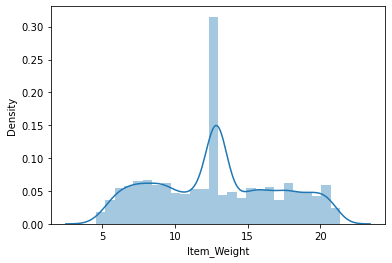

In [31]:
#Visualization of data
#Checking the distribution of float and int(initially) type columns
df_visualization_continous =df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]].copy()
sns.distplot(df_visualization_continous['Item_Weight'],kde =True)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

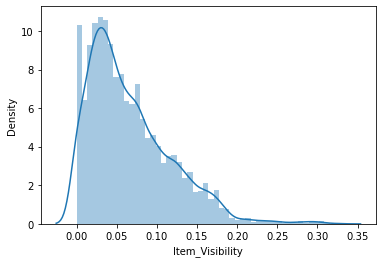

In [32]:
sns.distplot(df_visualization_continous['Item_Visibility'],kde =True)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

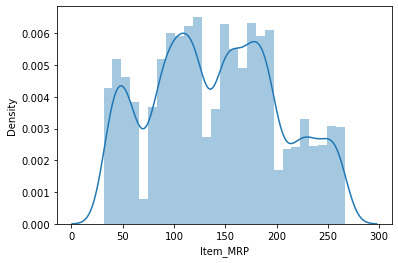

In [33]:
sns.distplot(df_visualization_continous['Item_MRP'],kde =True)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

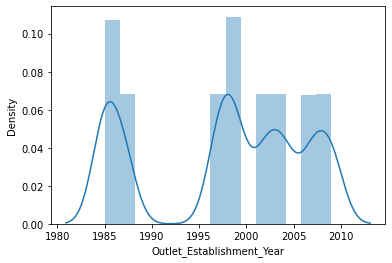

In [34]:
sns.distplot(df_visualization_continous['Outlet_Establishment_Year'],kde =True)

In [36]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.531386,0.066132,5.651062,140.992782,4.397161,1997.831867,0.669717,1.046580,0.692127,2181.288914
std,4.226124,0.813979,0.051598,3.669141,62.275067,2.785507,8.371760,0.884112,0.777719,1.060931,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,3.000000,93.826500,2.000000,1987.000000,0.000000,0.000000,0.000000,834.247400
50%,12.857645,0.000000,0.053931,5.000000,143.012800,4.000000,1999.000000,0.000000,1.000000,0.000000,1794.331000
75%,16.000000,1.000000,0.094585,7.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

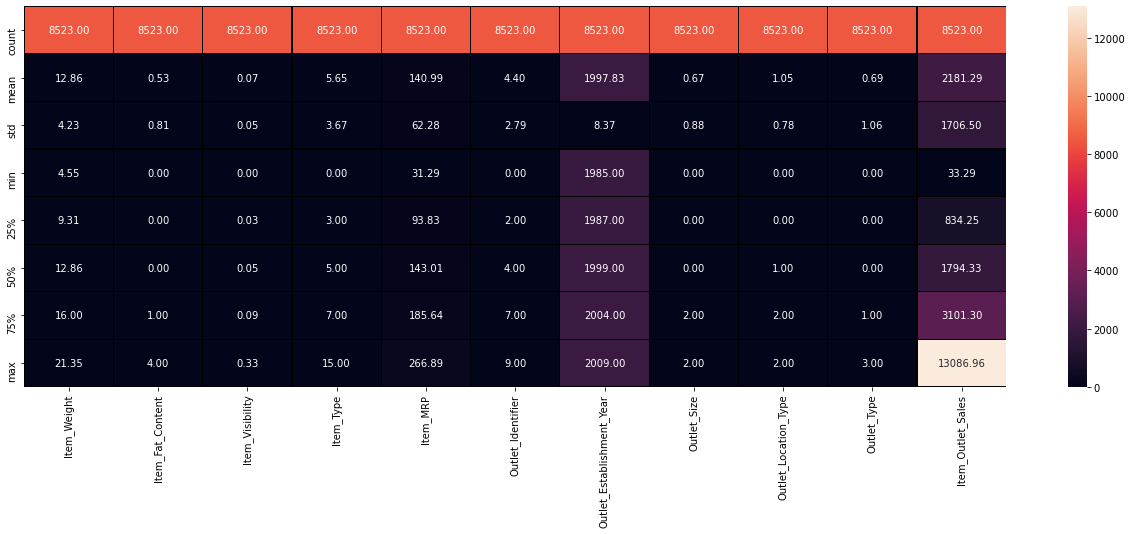

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize =(22,7))
sns.heatmap(df.describe(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

In [38]:
#Checking coorelation of all columns with the target column
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.091442
Outlet_Establishment_Year   -0.049135
Outlet_Identifier           -0.036944
Item_Type                   -0.007849
Item_Fat_Content            -0.005906
Outlet_Type                  0.005331
Item_Weight                  0.011550
Outlet_Location_Type         0.099404
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

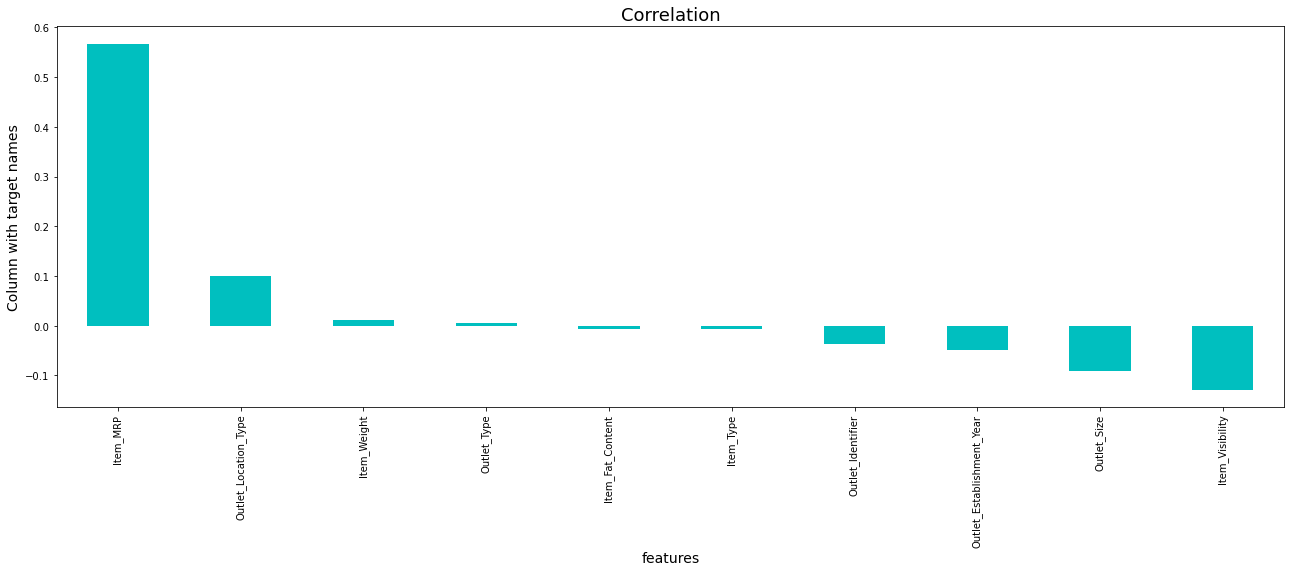

In [40]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

Taking +/-1.0 as the allowed range for skewness. All columns lie in this range.

<AxesSubplot:>

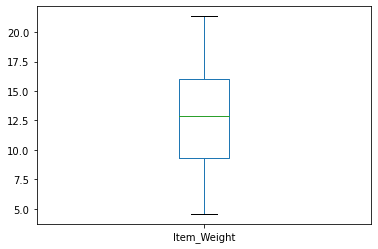

In [41]:
#Checking outliers for int and flot type columns (initially)
df["Item_Weight"].plot.box()

<AxesSubplot:>

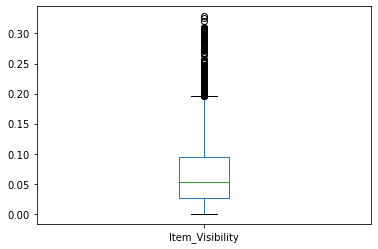

In [42]:
df["Item_Visibility"].plot.box()

<AxesSubplot:>

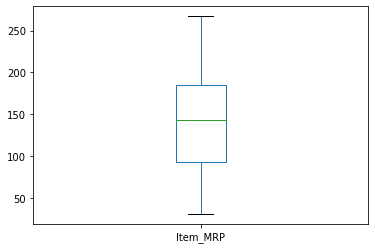

In [43]:
df["Item_MRP"].plot.box()

<AxesSubplot:>

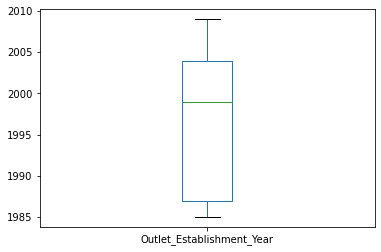

In [44]:
df["Outlet_Establishment_Year"].plot.box()

In [58]:
df2 = df.drop("Item_Identifier",axis =1)

In [77]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,0,249.8092,0,1999,0,0,0,3735.1380
1,DRC01,5.920,1,0.019278,1,48.2692,1,2009,0,1,1,443.4228
2,FDN15,17.500,0,0.016760,2,141.6180,0,1999,0,0,0,2097.2700
3,FDX07,19.200,1,0.000000,3,182.0950,2,1998,0,1,2,732.3800
4,NCD19,8.930,0,0.000000,4,53.8614,3,1987,1,1,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,6,214.5218,3,1987,1,1,0,2778.3834
8519,FDS36,8.380,1,0.046982,5,108.1570,5,2002,0,2,0,549.2850
8520,NCJ29,10.600,0,0.035186,9,85.1224,8,2004,2,2,0,1193.1136
8521,FDN46,7.210,1,0.145221,6,103.1332,1,2009,0,1,1,1845.5976


In [59]:
#Checking outlier data
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df2))
threshhold = 3
np.where(z>3)

(array([  45,   49,   65,   81,   83,  108,  121,  130,  145,  151,  174,
         175,  199,  207,  210,  219,  238,  276,  304,  333,  339,  373,
         389,  396,  415,  434,  439,  455,  456,  472,  481,  489,  502,
         504,  507,  521,  524,  532,  551,  589,  610,  615,  621,  661,
         677,  694,  727,  753,  753,  805,  809,  838,  851,  854,  891,
         905,  935,  946,  948,  991,  997, 1003, 1009, 1010, 1021, 1034,
        1051, 1086, 1090, 1104, 1116, 1118, 1124, 1133, 1138, 1159, 1179,
        1183, 1209, 1254, 1272, 1278, 1286, 1291, 1305, 1311, 1321, 1324,
        1335, 1372, 1393, 1403, 1433, 1434, 1445, 1450, 1460, 1496, 1501,
        1506, 1512, 1542, 1549, 1551, 1560, 1575, 1576, 1589, 1615, 1617,
        1632, 1640, 1644, 1651, 1653, 1655, 1661, 1680, 1684, 1690, 1693,
        1723, 1753, 1769, 1780, 1802, 1805, 1827, 1827, 1828, 1841, 1841,
        1849, 1859, 1865, 1869, 1913, 1945, 1953, 1955, 1978, 1985, 1998,
        2024, 2028, 2043, 2048, 2056, 

In [60]:
#removing outliers and checking data loss
df_new_z = df2[(z<3).all(axis=1)]
#df_new_z.shape
#percentage loss
data_loss = ((7043-6361)/7043)*100
data_loss

9.683373562402386

In [79]:
#Seperating input and output as features and target
features = df_new_z.drop("Item_Outlet_Sales",axis =1)
target = df_new_z["Item_Outlet_Sales"]


In [62]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
mms = MinMaxScaler()
lr = LinearRegression()
warnings.filterwarnings("ignore")
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.2,random_state =i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f"at random state {i}, the train accuracy is: {r2_score(target_train,pred_train)}")
    print(f"at random state {i}, the test accuracy is: {r2_score(target_test,pred_test)}")
    print("\n")

at random state 0, the train accuracy is: 0.3584829482671622
at random state 0, the test accuracy is: 0.37455832590542815


at random state 1, the train accuracy is: 0.35688417381751036
at random state 1, the test accuracy is: 0.38071140768432754


at random state 2, the train accuracy is: 0.3625031258495498
at random state 2, the test accuracy is: 0.35772337907829366


at random state 3, the train accuracy is: 0.35745491854225486
at random state 3, the test accuracy is: 0.3773766516324246


at random state 4, the train accuracy is: 0.3579789732965192
at random state 4, the test accuracy is: 0.3754885287890112


at random state 5, the train accuracy is: 0.35638748572084133
at random state 5, the test accuracy is: 0.38285153010969286


at random state 6, the train accuracy is: 0.3582498184616266
at random state 6, the test accuracy is: 0.37399951578896395


at random state 7, the train accuracy is: 0.358908680782669
at random state 7, the test accuracy is: 0.3721529778384861


at random

In [63]:
#we are selecting random state as 80 because at i=24 we are getting highest test accuracy
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.2,random_state =24)
#training the model
lr.fit(features_train,target_train)
#Predicting values
pred_test = lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.38835734718566617


In [64]:
#Cross validation of model
Training_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
#Checking at what random state we have highest cross validation score and test accuracy
for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)#cv = j means my data will be divided into j equal parts
    cv_mean= cv_score.mean()
    print(f"At cross fold {j} the cv score is: {cv_mean} and accuracy score for training is: {Training_accuracy} and accuracy for testing is: {Test_accuracy}")
    print("\n")      

At cross fold 2 the cv score is: 0.35662937994759036 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 3 the cv score is: 0.35817381601231285 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 4 the cv score is: 0.3578413573873701 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 5 the cv score is: 0.35864850662110365 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 6 the cv score is: 0.359255304586368 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 7 the cv score is: 0.3590698123947327 and accuracy score for training is: -0.32412411547830544 and accuracy for testing is: 0.38835734718566617


At cross fold 8 the cv score is: 0.359

Since we have highest cv score in cross fold 6 So we will select j=6 (as no impact of j on test score )

In [65]:
cv_score = cross_val_score(lr,features,target,cv=6)#cv = j means my data will be divided into j equal parts
cv_mean= cv_score.mean()

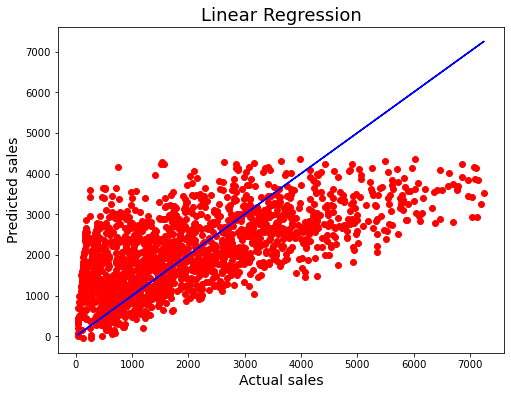

In [66]:
#drawing scatterplot to confirm the best fit line
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x= target_test,y=pred_test,color = "r")
plt.plot(target_test,target_test, color = "b")
plt.xlabel("Actual sales",fontsize = 14)
plt.ylabel("Predicted sales", fontsize = 14)
plt.title("Linear Regression", fontsize = 18)
plt.savefig("lr.png")
plt.show()

In [67]:
#regularization to remove overfitting and underfitting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls =Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [68]:
#training as per best params
ls =Lasso(alpha =0.0001, random_state = 0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

35.500187569349364

In [70]:
#getting ls score
lss = r2_score(target_test,pred_ls)
lss*100

38.83573551570423

In [71]:
#getting cv score
cv_score = cross_val_score(ls,features,target,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

35.86485079644899

In [73]:
#Ensembling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'criterion':['mse','mse'],'max_features':["auto","sqrt","log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)
#training as per best params
rf =RandomForestRegressor(criterion ="mse", max_features = "sqrt")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)
#getting ls score
rfs= r2_score(target_test,pred_ls)
rfs*100
#getting cv score
rf_score = cross_val_score(rf,features,target,cv=5)
rf_mean = cv_score.mean()
rf_mean*100

{'criterion': 'mse', 'max_features': 'sqrt'}


35.86485079644899

In [85]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(rf,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
conclusion =pd.DataFrame([loaded_model.predict(x)[:],y],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Predicted,3705.596454,594.239816,2185.202206,600.897816,938.14549,655.593286,528.14585,2743.149264,1205.19787,3859.569362,...,917.40582,584.246158,1862.828504,935.968324,2767.99692,3046.707458,1637.022434,1239.127038,1620.850152,888.323676
Original,3735.138000,443.422800,2097.270000,732.380000,994.70520,556.608800,343.55280,4022.763600,1076.59860,4710.535000,...,595.22520,468.723200,1571.288000,858.882000,3608.63600,2778.383400,549.285000,1193.113600,1845.597600,765.670000
